# ----------------------------DIP Assignment----------------------------

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
from numpy import linalg as LA
import math
import os
from collections import defaultdict

# Question 1

# Use PCA (KL Transform) to obtain the reduce dimensionality representation of face image. Illustrate the reconstruction of images using different number of PCs.

In [2]:
def readImagesFile(path=r"C:/Users/MANVENDRA/Desktop/study material/First Semester/digital image processing/Assignment 2/faces94/test"):
    return [os.path.join(path,File) for File in os.listdir(path) if File.endswith(".jpg")]
ImageFile = readImagesFile()
LenImageFile=len(ImageFile)
print(LenImageFile)
images=[]
for F in ImageFile:
    images.append(cv2.imread(F,cv2.IMREAD_GRAYSCALE))
for i in range(0,LenImageFile):
    images[i] = cv2.resize(images[i], (64,64))
    


Shape=images[0].shape
col1=images[0].ravel().tolist()


for i in range(1,LenImageFile):
    Newcol=images[i].ravel().tolist()
    col1=np.vstack((col1,Newcol))

means=col1.mean(0)
img=np.transpose(col1)
print(img.shape)

216
(4096, 216)


In [3]:
for i in range (LenImageFile):
    img[:,i]=img[:,i]-means
cmat=np.dot(img,(img.T))
evals,evec=np.linalg.eigh(cmat)

[-6.36632619e-07 -6.06089121e-07 -3.45343538e-07 ...  3.05242508e+08
  3.47158847e+08  7.65638403e+08]
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  5.62615410e-03
  -1.05719797e-02 -1.78100771e-02]
 [ 4.06400013e-02  3.08084078e-01  2.61727826e-01 ...  5.35843872e-03
  -1.04824382e-02 -1.78890206e-02]
 [-5.10912152e-01  3.58640631e-01 -2.86786976e-01 ...  5.57129495e-03
  -1.07875797e-02 -1.77612162e-02]
 ...
 [ 1.72505907e-03 -3.93832440e-03  5.41595697e-03 ... -2.24994671e-02
  -2.54832383e-03  1.68493875e-02]
 [-5.00996651e-04  8.47170895e-05  9.13877873e-04 ... -2.15271384e-02
  -4.18328564e-03  1.33685455e-02]
 [ 5.02491696e-03  4.12869969e-04  1.09481691e-03 ... -2.16933234e-02
  -4.44417491e-03  1.05514354e-02]]


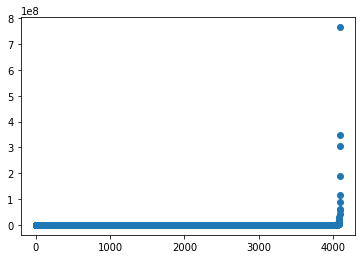

In [4]:
print(evals)
print(evec)
xx=np.arange(0,4096)
plt.scatter(xx,evals)

In [5]:
basis=evec[:,4096:]
y=np.dot((basis.T),img)
res=np.dot(basis,y)
for i in range (LenImageFile):
    res[:,i]=res[:,i]+means
print(res)

[[111.37962963 111.37962963 111.37962963 ... 111.37962963 111.37962963
  111.37962963]
 [111.61111111 111.61111111 111.61111111 ... 111.61111111 111.61111111
  111.61111111]
 [110.87962963 110.87962963 110.87962963 ... 110.87962963 110.87962963
  110.87962963]
 ...
 [ 79.43055556  79.43055556  79.43055556 ...  79.43055556  79.43055556
   79.43055556]
 [ 75.375       75.375       75.375      ...  75.375       75.375
   75.375     ]
 [ 77.58796296  77.58796296  77.58796296 ...  77.58796296  77.58796296
   77.58796296]]


Text(0.5, 1.0, 'reconstructed image 6')

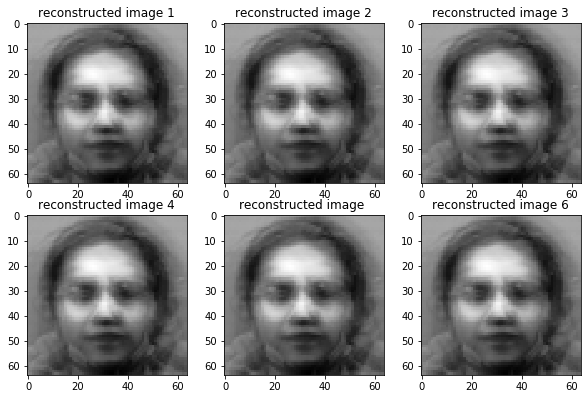

In [6]:
figure=plt.figure(figsize=(10,10))
img1 = res[:,23]
img1 = img1.reshape((64,64)) 
plt.subplot(3,3,1),plt.imshow(img1,cmap='Greys_r')
plt.title('reconstructed image 1')

img2 = res[:,7]
img2 = img2.reshape((64,64)) 
plt.subplot(3,3,2),plt.imshow(img2,cmap='Greys_r')
plt.title('reconstructed image 2')

img3 = res[:,100]
img3 = img3.reshape((64,64))
plt.subplot(3,3,3),plt.imshow(img3,cmap='Greys_r')
plt.title('reconstructed image 3')

img4 = res[:,122]
img4 = img4.reshape((64,64))
plt.subplot(3,3,4),plt.imshow(img4,cmap='Greys_r')
plt.title('reconstructed image 4')

img5 = res[:,70]
img5 = img5.reshape((64,64))
plt.subplot(3,3,5),plt.imshow(img5,cmap='Greys_r')
plt.title('reconstructed image ')

img6 = res[:,100]
img6 = img6.reshape((64,64))
plt.subplot(3,3,6),plt.imshow(img6,cmap='Greys_r')
plt.title('reconstructed image 6')

# Question 2

# Show the filtering of images using ideal low-pass and high-pass filter, Gaussian low-pass and high-pass filters. Show the results using different cut-off frequency.

512 512
(512, 512)
(512, 512)


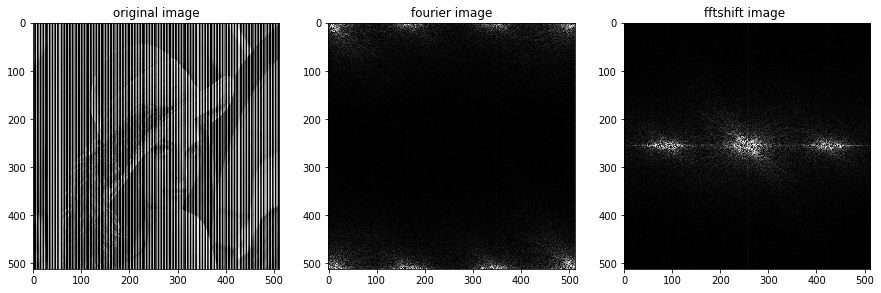

In [72]:
#Calculating FFT then shifting it to origin of image and then finally calculating the absolute value
img = cv2.imread('lenna.png',0) 
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow((img),cmap='gray')
plt.title('original image')
rows=img.shape[0]
cols=img.shape[1]
if (rows%2==0 and cols%2!=0):
    img=np.concatenate((img,np.zeros((1,cols))),axis=0)
    
if (rows%2!=0 and cols%2==0):
    img=np.concatenate((img,np.zeros((rows,1))),axis=1)
if (rows%2!=0 and cols%2!=0):
    img=np.concatenate((img,np.zeros((1,cols))),axis=0)
    img=np.concatenate((img,np.zeros((rows+1,1))),axis=1)
[rows,cols]=img.shape
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
img=np.double(img)
A=np.fft.fft2(img)
plt.subplot(1,3,2)
plt.imshow(np.uint8(abs(A)),cmap='gray')
plt.title('fourier image')
A1=np.fft.fftshift(A)
Abs=abs(A1)
plt.subplot(1,3,3)
plt.imshow(np.uint8(Abs),cmap='gray')
plt.title('fftshift image ')
print(rows,cols)
print(A1.shape)
print(Abs.shape)

Enter horizontal cutoff= 100
Enter vertical cutoff= 100
(512, 512)
(512, 512)


Text(0.5, 1.0, 'Image after passing through low pass filter')

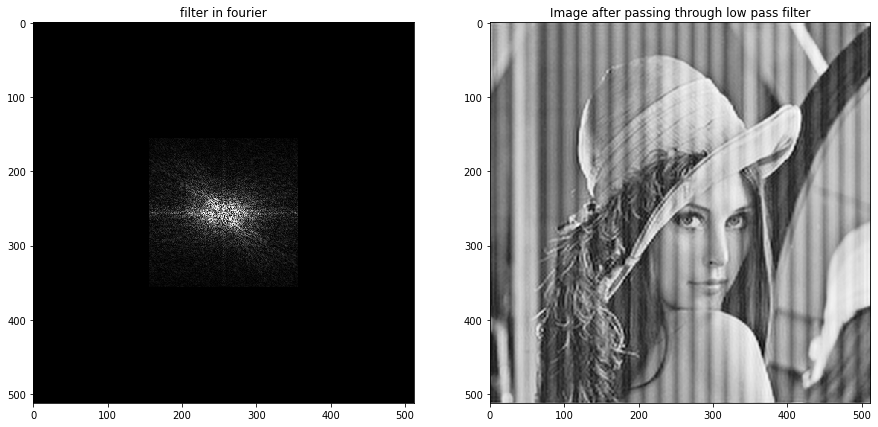

In [85]:
horz=int(input('Enter horizontal cutoff= '))
vert=int(input('Enter vertical cutoff= '))

#-----------------------------------------------for Low pass filter----------------------------------------------- 
w=(rows-2*horz)/2
x=(cols-2*vert)/2
temp1=np.zeros((int(w),int(cols)))
temp2=np.zeros((2*horz,int(x)))
d1=np.concatenate((temp2, np.ones((2*horz, 2*vert)), temp2), axis=1)
d2=np.concatenate((temp1,d1,temp1), axis=0)
print(d2.shape)
#computing the FFT of Low pass image
finalfft=np.multiply(d2,(A1))
#Inverse FFT step
figure=plt.figure(figsize=(15,15))
B=np.fft.fftshift(finalfft)
B1=np.fft.ifft2(B)
B2=abs(B1)
print(B2.shape)
plt.subplot(1,2,1),plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
plt.title('filter in fourier')
plt.subplot(1,2,2),plt.imshow(B2,cmap='Greys_r')
plt.title('Image after passing through low pass filter')

Enter horizontal cutoff= 30
Enter vertical cutoff= 30
(512, 512)
(512, 512)


Text(0.5, 1.0, 'Image after passing through high pass filter')

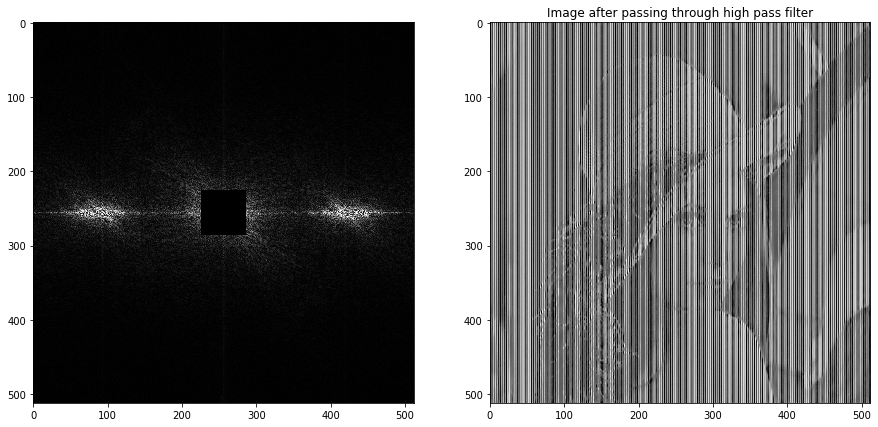

In [43]:
horz=int(input('Enter horizontal cutoff= '))
vert=int(input('Enter vertical cutoff= '))
#------------------------------------------------high pass filter_----------------------------------------------------
w=(rows-2*horz)/2
x=(cols-2*vert)/2
temp1=np.ones((int(w),int(cols)))
temp2=np.ones((2*horz,int(x)))
d1=np.concatenate((temp2, np.zeros((2*horz, 2*vert)), temp2), axis=1)
d2=np.concatenate((temp1,d1,temp1), axis=0)
print(d2.shape)
#computing the FFT of Low pass image
finalfft=np.multiply(d2,(A1))
#Inverse FFT step
figure=plt.figure(figsize=(15,15))
B=np.fft.fftshift(finalfft)
B1=np.fft.ifft2(B)
B2=abs(B1)
print(B2.shape)
plt.subplot(1,2,1),plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
plt.subplot(1,2,2),plt.imshow(B2,cmap='Greys_r')
plt.title('Image after passing through high pass filter')

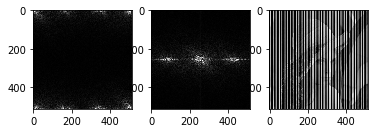

In [24]:
#Designing the gaussian filters
img = cv2.imread('C:/Users/MANVENDRA/Desktop/study material/First Semester/digital image processing/Assignment 2/lenna.png',0) 
plt.subplot(1,3,3)
plt.imshow(np.uint8(img),cmap='gray')
img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)

#Getting the image in frequency domain
A=np.fft.fft2(img)
plt.subplot(1,3,1)
plt.imshow(np.uint8(abs(A)),cmap='gray')
A1=np.fft.fftshift(A)
Abs=abs(A1)
plt.subplot(1,3,2)
plt.imshow(np.uint8(Abs),cmap='gray')


In [73]:
#Generating a gaussian low pass fiter
def gaus(x, y,sx):
    return np.exp(-((x**2+y**2)/ (2* sx**2)))

sx=int(input('Enter the value of Variance= '))
gaussIm=np.zeros(img.shape)
x=np.linspace(-img.shape[0],img.shape[0],img.shape[0])
y=np.linspace(-img.shape[1],img.shape[1],img.shape[1])
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        z=gaus(x[i],y[j],sx)
        gaussIm[i][j]=z

Enter the value of Variance= 25


(512, 512)


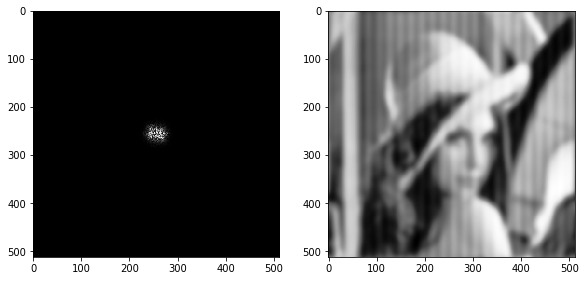

In [74]:
finalfft=np.multiply(A1,gaussIm)
C=np.fft.fftshift(finalfft)
C1=np.fft.ifft2(C)
C2=abs(C1)
print(C2.shape)
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(np.uint8(abs(finalfft)),cmap='Greys_r')
img = C2
plt.subplot(1,3,2)
plt.imshow(C2,cmap='Greys_r')

(512, 512)


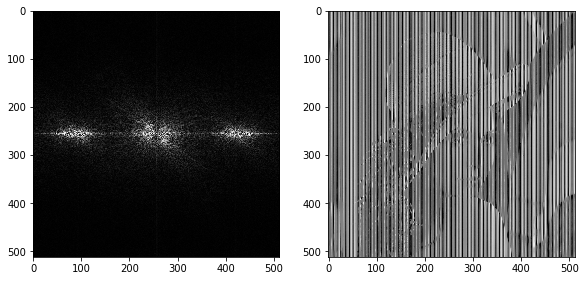

In [33]:
#Generating a gaussian high pass fiter
q=np.ones(img.shape)
gaussH=q-gaussIm

finalfft1=np.multiply(A1,gaussH)
C=np.fft.fftshift(finalfft1)
C1=np.fft.ifft2(C)
C2=abs(C1)
print(C2.shape)
figure=plt.figure(figsize=(15,15))
plt.subplot(1,3,1)
plt.imshow(np.uint8(abs(finalfft1)),cmap='Greys_r')
plt.subplot(1,3,2)
plt.imshow(C2,cmap='Greys_r')

# Question 3

# Use Hough transform to obtain circles for a given radius in given image

In [ ]:
minr=int(input('Enter the minimum radius= '))
maxr=int(input('Enter the maximum radius= '))
# Read image. 
img = cv2.imread('C:/Users/MANVENDRA/Desktop/study material/digital image processing/Assignment 2/coin.png', 0) 
  
# Blur using 3 * 3 kernel. 
gray_blurred = cv2.blur(img, (3, 3)) 
  
# Apply Hough transform on the blurred image. 
detected_circles = cv2.HoughCircles(img,  
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 50, 
               param2 = 30, minRadius = minr, maxRadius = maxr) 
  
# Draw circles that are detected. 
if detected_circles is not None: 
  
    # Convert the circle parameters a, b and r to integers. 
    detected_circles = np.uint16(np.around(detected_circles)) 
  
    for pt in detected_circles[0, :]: 
        a, b, r = pt[0], pt[1], pt[2] 
  
        # Draw the circumference of the circle. 
        cv2.circle(img, (a, b), r, (15,200, 250), 2) 
  
        # Draw a small circle (of radius 1) to show the center. 
        cv2.circle(img, (a, b), 1, (0, 0, 0), 3)
        plt.imshow(img,cmap='Greys_r')
else:
    print('------------Invalid radius------------')

# ----------Just a try of Hough Transform without function----------

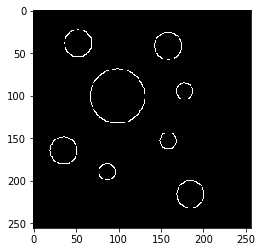

In [21]:
img = cv2.imread('testb.png')
img=cv2.resize(img,(256,256))
# imgC=img.copy()
gausBlur = cv2.GaussianBlur(img, (3,3),0)
grayImg = cv2.cvtColor(gausBlur, cv2.COLOR_BGR2GRAY)
edgeImg=cv2.Canny(grayImg,100,200)
plt.imshow((edgeImg),cmap='Greys_r')

In [15]:
[row,col]=edgeImg.shape
r=round(math.sqrt(((row)**2)+((col)**2)))
edges = np.argwhere(edgeImg[:,:])

#count=defaultdict(int)
count=np.zeros((row,col,r))
print(count[1,2,3])

0.0


In [16]:
for x,y in edges:
    for h in range (1,row):
        for k in range (1,col):
            r=round(math.sqrt(((x-h)**2)+((y-k)**2)))
            count[h,k,r] =count[h,k,r]+1
print(count)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [17]:
count1=[]
temp2=count
[v1,v2,v3]=(count.shape)
for i in range(50):
    z=(np.max(temp2))
    for h in range(1,v1):
        for k in range(1, v2):
            for rad in range(1,v3):
                if count[h,k,rad]==z:
                    count1.append([h,k,rad])
                    temp2[h,k,rad]=0
            
print(count1)

[[101, 99, 32], [100, 99, 32], [101, 98, 32], [42, 158, 16], [100, 98, 32], [216, 184, 16], [101, 100, 33], [165, 35, 16], [216, 185, 16], [101, 100, 31], [164, 35, 16], [38, 53, 16], [100, 98, 33], [38, 52, 16], [39, 53, 16], [39, 52, 16], [101, 98, 31], [102, 99, 33], [100, 98, 31], [100, 100, 31], [101, 98, 33], [41, 158, 16], [99, 99, 33], [100, 100, 33], [102, 98, 33], [102, 100, 33], [165, 36, 16], [99, 99, 31], [102, 98, 31], [102, 99, 31], [164, 36, 16], [42, 159, 16], [101, 97, 31], [102, 97, 30], [100, 100, 32], [101, 97, 33], [101, 101, 34], [99, 98, 33], [100, 101, 34], [102, 99, 32], [99, 98, 31], [103, 99, 34], [98, 98, 34], [98, 99, 34], [215, 184, 16], [100, 99, 31], [100, 99, 33], [102, 97, 34], [102, 101, 34], [98, 99, 30], [102, 101, 30], [101, 100, 32], [99, 100, 30], [99, 100, 33], [100, 97, 33], [101, 101, 30], [97, 98, 35], [99, 97, 30], [100, 96, 34], [101, 96, 34], [103, 98, 34], [103, 100, 34], [215, 185, 16], [97, 99, 35], [100, 101, 30], [101, 102, 35], [100

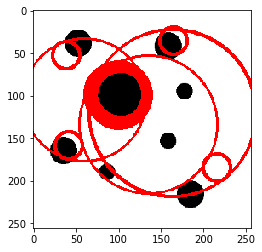

In [24]:
for i in range(50):
    im=cv2.circle(img, (count1[i][0],count1[i][1]),count1[i][2],(255,0,0),2)
plt.imshow(im)

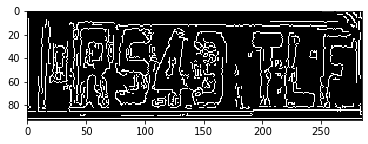

In [19]:
img = cv2.imread('repaired.jpg')
# img=cv2.resize(img,(256,256))
# imgC=img.copy()
gausBlur = cv2.GaussianBlur(img, (3,3),0)
grayImg = cv2.cvtColor(gausBlur, cv2.COLOR_BGR2GRAY)
edgeImg=cv2.Canny(grayImg,100,200)
plt.imshow((edgeImg),cmap='Greys_r')

In [2]:
4%2

0